# **Problema das N Rainhas**

O problema das N Rainhas é um problema matemático que visa colocar em um tabuleiro de xadrez de dimensão N x N, N Rainhas sem que uma ataque a outra, ou seja, nenhuma rainha vai poder ser atacada por outra.

Uma rainha não pode ser colocada na mesma Linha, Coluna ou Diagonal que outra, caso contrário elas poderão se atacar



Exemplo de Configuração válida com N = 8 :

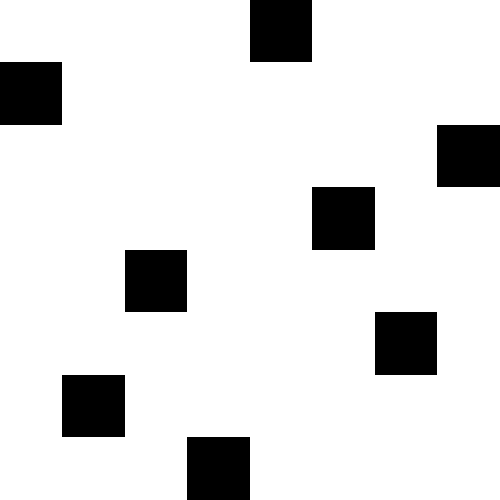


Normalmente o problema é dito com N = 8, ou seja, "O Problema das 8 Rainhas" ou até descrito como Damas




Exemplo de Configuração válida com N = 150 :

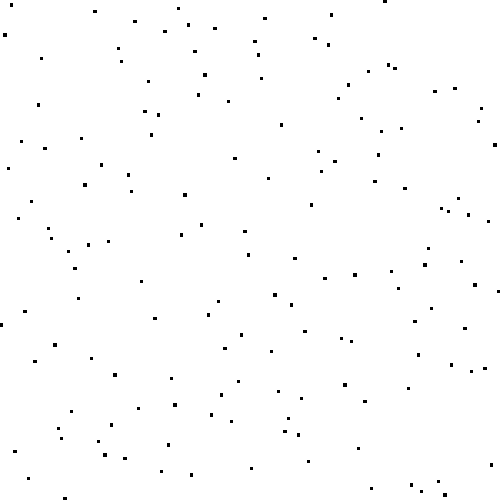

In [446]:
#Importa as bibliotecas para randomizar o algoritmo
import random

#Importa as bibliotecas para o desenho do tabuleiro
from PIL import Image, ImageColor

# Função Preencher


A Função preencher, pega uma posição específica do tabuleiro e coloca uma Rainha nela

Também bloqueia as posições em que essa Rainha ataca, para que novas Rainhas não sejam colocadas nessas posições

In [548]:
#Função que preenche um espaço do tabuleiro, invalidando a coluna para a colocação de outra peça, também como as diagonais
def preencher(l,c):
  if (tab[l][c]==0):
    
    esq=c
    dir=c
    
    tab[l][c]=1

    l+=1

    while(l<TAM):
      
      esq-=1
      dir+=1

      if (esq>=0):
        tab[l][esq]=2
      
      if (dir<TAM):
        tab[l][dir]=2

      tab[l][c]=2

      l+=1

# Função Buscar


A Função buscar, recebe uma linha do tabuleiro, e verifica as posições dela que estão disponíveis para se colocar uma nova Rainha

Então escolhe aleatóriamente uma dessas posições para poder ser usada para colocar outra Rainha

In [448]:
def buscar(linha):

  prox=[]

  for i in range(TAM):
    if (tab[linha][i]==0):
      prox.append(i)

  random.shuffle(prox)

  return prox


# Execução do Código

Gera uma combinação nova a cada execução para N Rainhas

Através da força bruta, gerando e testando várias combinações de tabuleiros até encontrar uma que satisfaça a condição inicial do problema


Após encontrar uma configuração válida, desenha ela com pixels para melhor visualização

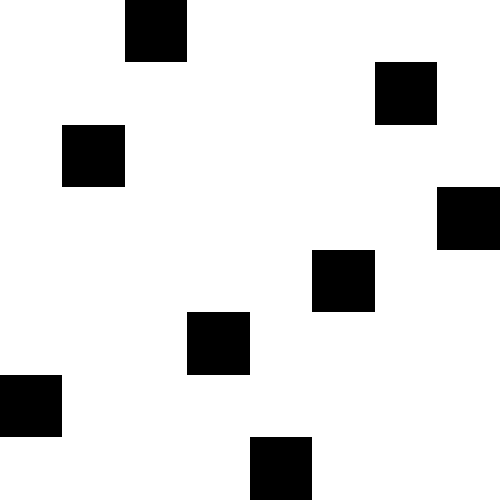

In [622]:
#Define o Tamanho N do Tabuleiro
#Precisa ser maior que 3 para funcionar corretamente
TAM=8


#Enquanto não encontrar um padrão válido, tente novamente
falhou=1
while(falhou==1):
  falhou=0
  

  #Cria a Matriz do tabuleiro
  tab = []
  linha = []

  for i in range(TAM):
    for i in range(TAM):
      linha.append(0)
    tab.append(linha)
    linha = []


  for l in range(TAM):

    if len(buscar(l))>0:

      #Escolhe uma posição disponível da linha L
      num=buscar(l)[0]

      #Caso alguma posição esteja disponível, preencher ela
      #Caso contrário, tente novamente do zero
      if (num>=0):
        preencher(l,num)
      else:
        falhou=1
        continue;

    else:
      falhou=1
      continue;


#Cria a imagem vazia do tabuleiro
IMG=Image.new('1',size=(TAM,TAM),color='white')


for a in range(TAM):
  for b in range(TAM):
    if (tab[a][b]==1):
      #Percorre o tabuleiro inteiro e pinta o pixel correspondente
      IMG.putpixel((a,b), ImageColor.getcolor('black', '1')) 


#Exibe a imagem em tamanho 500x500
IMG.resize((500,500), Image.ANTIALIAS)